In [1]:
import datasets

ds = datasets.load_dataset('joyheyueya/250428_abstract_pair', split='train')
ds = ds.train_test_split(test_size=0.001, seed=42)
ds

DatasetDict({
    train: Dataset({
        features: ['joint_prompt', 'paper1_prompt', 'paper2_prompt', 'no_context_prompt', 'abstracts', 'forum_id_1', 'forum_id_2', 'pair_id'],
        num_rows: 99897
    })
    test: Dataset({
        features: ['joint_prompt', 'paper1_prompt', 'paper2_prompt', 'no_context_prompt', 'abstracts', 'forum_id_1', 'forum_id_2', 'pair_id'],
        num_rows: 100
    })
})

In [2]:
ds['train'][0]

{'joint_prompt': 'Your task is to identify and elaborate on an insight that only becomes apparent by combining information from both documents together—i.e., an insight that has high relevance when treating the documents jointly but low relevance if you were to consider each document alone. Write the insight as a standalone statement that does not reference the original texts or use terms like "paper" or "document". The insight should involve indirect connections or intermediate reasoning steps, such as linking cause and effect through a shared variable or mechanism. Here are some examples: Let A = magnesium — either dietary or internal to the body. Implicitly refers, inmost cases, to quantity of magnesium. Let M = migraine headache. Let L = one or more intermediate physiological links.  -> means \'can or might influence\'. == means \'equivalent in action\' or \'equivalent in mechanism\' depending on whether it connects two drugs or two diseases. Paper 1:\nStress and Type A behavior ar

In [3]:
from typing import Dict, Any, Optional
import os
def make_map_fn(split: str):
    """Create a mapping function to process dataset examples.

    Args:
        split: Dataset split name ('train' or 'test')

    Returns:
        Function that processes individual dataset examples
    """
    def process_fn(example: Dict[str, Any], idx: int) -> Optional[Dict[str, Any]]:
        question = example.pop('joint_prompt')
        answer = '' # empty string (dummy)

        data = {
            "data_source": "",
            "prompt": [{
                "role": "user",
                "content": question
            }],
            "ability": "insight",
            "reward_model": {
                "style": "rule",
                "ground_truth": answer
            },
            "extra_info": {
                'joint_prompt': question,
                'paper1_prompt': example['paper1_prompt'],
                'paper2_prompt': example['paper2_prompt'],
                'no_context_prompt': example['no_context_prompt'],
                'abstracts': example['abstracts'],
                'forum_id_1': example['forum_id_1'],
                'forum_id_2': example['forum_id_2'],
                'pair_id': example['pair_id'],
                'split': split,
                'index': idx
            }
        }
        return data
    return process_fn

ds_train = ds['train'].map(function=make_map_fn('train'), with_indices=True, num_proc=os.cpu_count())
ds_test = ds['test'].map(function=make_map_fn('test'), with_indices=True, num_proc=os.cpu_count())


ds_train

Map (num_proc=24):   0%|          | 0/99897 [00:00<?, ? examples/s]

Map (num_proc=24):   0%|          | 0/100 [00:00<?, ? examples/s]

Dataset({
    features: ['paper1_prompt', 'paper2_prompt', 'no_context_prompt', 'abstracts', 'forum_id_1', 'forum_id_2', 'pair_id', 'data_source', 'prompt', 'ability', 'reward_model', 'extra_info'],
    num_rows: 99897
})

In [4]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('Qwen/Qwen2.5-3B')

def map_tok_length(example):
    example['prompt_tok_length'] = len(tokenizer.encode(example['prompt'][0]['content']))
    return example

ds_train = ds_train.map(map_tok_length, num_proc=os.cpu_count())
ds_test = ds_test.map(map_tok_length, num_proc=os.cpu_count())

Map (num_proc=24):   0%|          | 0/99897 [00:00<?, ? examples/s]

Map (num_proc=24):   0%|          | 0/100 [00:00<?, ? examples/s]

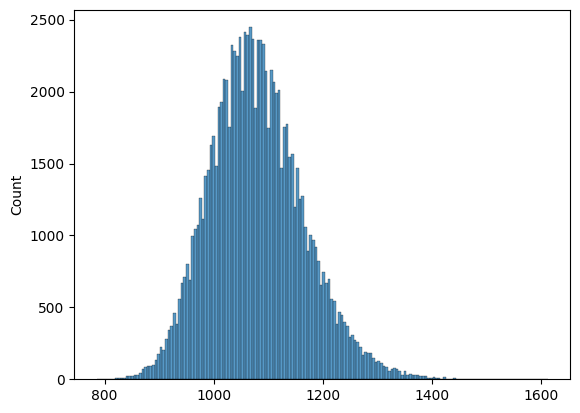

Mean:  1079.125078831196
Median:  1073.0
Std:  85.79160184024276
Min:  786
Max:  1612
99th percentile:  1307.0
95th percentile:  1230.0
90th percentile:  1191.0


In [5]:
from matplotlib import pyplot as plt
from seaborn import histplot
all_tok_lengths = ds_train['prompt_tok_length']
histplot(all_tok_lengths)
plt.show()

import numpy as np
print('Mean: ', np.mean(all_tok_lengths))
print('Median: ', np.median(all_tok_lengths))
print('Std: ', np.std(all_tok_lengths))
print('Min: ', np.min(all_tok_lengths))
print('Max: ', np.max(all_tok_lengths))
print('99th percentile: ', np.percentile(all_tok_lengths, 99))
print('95th percentile: ', np.percentile(all_tok_lengths, 95))
print('90th percentile: ', np.percentile(all_tok_lengths, 90))

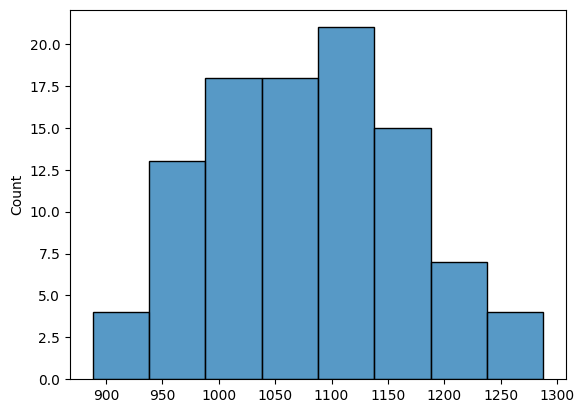

Mean:  1077.55
Median:  1079.0
Std:  84.86794153271305
Min:  888
Max:  1288
99th percentile:  1252.3600000000001
95th percentile:  1211.35
90th percentile:  1193.1


In [6]:
from matplotlib import pyplot as plt
from seaborn import histplot
all_tok_lengths = ds_test['prompt_tok_length']
histplot(all_tok_lengths)
plt.show()

import numpy as np
print('Mean: ', np.mean(all_tok_lengths))
print('Median: ', np.median(all_tok_lengths))
print('Std: ', np.std(all_tok_lengths))
print('Min: ', np.min(all_tok_lengths))
print('Max: ', np.max(all_tok_lengths))
print('99th percentile: ', np.percentile(all_tok_lengths, 99))
print('95th percentile: ', np.percentile(all_tok_lengths, 95))
print('90th percentile: ', np.percentile(all_tok_lengths, 90))

In [7]:
ds_train['extra_info'][0]

{'abstracts': ["Current benchmarks like ``$\\textit{Needle-in-a-Haystack}$'' ($\\textit{NIAH}$), $\\textit{Ruler}$, and $\\textit{Needlebench}$ focus on models' ability to understand long-context input sequences but fail to capture a critical dimension: the generation of high-quality long-form text. Applications such as design proposals, technical documentation, and creative writing rely on coherent, instruction-following outputs over extended sequences—a challenge that existing benchmarks do not adequately address. To fill this gap, we introduce $\\textit{LongGenBench}$, a novel benchmark designed to rigorously evaluate large language models' (LLMs) ability to generate long text while adhering to complex instructions. Through tasks requiring specific events or constraints within generated text, $\\textit{LongGenBench}$ evaluates model performance across four distinct scenarios, three instruction types, and two generation-lengths (16K and 32K tokens). Our evaluation of ten state-of-the

In [8]:
ds_train.to_parquet('/home/anikait.singh/rl_behaviors_verl_stable/data_insights_rl/train.parquet')
ds_test.to_parquet('/home/anikait.singh/rl_behaviors_verl_stable/data_insights_rl/test.parquet')

Creating parquet from Arrow format:   0%|          | 0/100 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

2281384

In [9]:
ds_train

Dataset({
    features: ['paper1_prompt', 'paper2_prompt', 'no_context_prompt', 'abstracts', 'forum_id_1', 'forum_id_2', 'pair_id', 'data_source', 'prompt', 'ability', 'reward_model', 'extra_info', 'prompt_tok_length'],
    num_rows: 99897
})

In [10]:
ds_test

Dataset({
    features: ['paper1_prompt', 'paper2_prompt', 'no_context_prompt', 'abstracts', 'forum_id_1', 'forum_id_2', 'pair_id', 'data_source', 'prompt', 'ability', 'reward_model', 'extra_info', 'prompt_tok_length'],
    num_rows: 100
})

In [11]:
ds_test_filt = ds_test.filter(lambda x: x['prompt_tok_length'] < 1280, num_proc=os.cpu_count())
ds_test_filt

Filter (num_proc=24):   0%|          | 0/100 [00:00<?, ? examples/s]

Dataset({
    features: ['paper1_prompt', 'paper2_prompt', 'no_context_prompt', 'abstracts', 'forum_id_1', 'forum_id_2', 'pair_id', 'data_source', 'prompt', 'ability', 'reward_model', 'extra_info', 'prompt_tok_length'],
    num_rows: 99
})

In [12]:
ds_dict = datasets.DatasetDict({
    'train': ds_train,
    'test': ds_test
})
ds_dict.push_to_hub('Asap7772/insight_rl')

Uploading the dataset shards:   0%|          | 0/5 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Asap7772/insight_rl/commit/b5b10268529cad659e396a6a0224ac354457392d', commit_message='Upload dataset', commit_description='', oid='b5b10268529cad659e396a6a0224ac354457392d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Asap7772/insight_rl', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Asap7772/insight_rl'), pr_revision=None, pr_num=None)

In [14]:
print(ds_train[0]['extra_info']['joint_prompt'])

Your task is to identify and elaborate on an insight that only becomes apparent by combining information from both documents together—i.e., an insight that has high relevance when treating the documents jointly but low relevance if you were to consider each document alone. Write the insight as a standalone statement that does not reference the original texts or use terms like "paper" or "document". The insight should involve indirect connections or intermediate reasoning steps, such as linking cause and effect through a shared variable or mechanism. Here are some examples: Let A = magnesium — either dietary or internal to the body. Implicitly refers, inmost cases, to quantity of magnesium. Let M = migraine headache. Let L = one or more intermediate physiological links.  -> means 'can or might influence'. == means 'equivalent in action' or 'equivalent in mechanism' depending on whether it connects two drugs or two diseases. Paper 1:
Stress and Type A behavior are associated with migrain